# Visual Question Answering for Visually Challenged People

We live in a world where most of our problems can be solved by Machine Learning and Artificial
Intelligence. Answering visual questions is one such problem which can benefit humanity in many
ways. As human beings we use our sights to gather information about any activity happening in
front of us or to draw information from a picture. We use this information to answer questions
and reach certain conclusions about any given sight or picture. However, not all humans have
the gift of sight.

## Problem Statement

With this project, I aim to answer questions asked regarding any given image. My goal is to create
a service which takes up an image and a question and efficiently predict the answer to the
question based on the objects in the image and the context of the question.

### Business Constraints

The constraints for this problem are as follows –
1. Latency: The solution to this problem should have very low latency as the end user might need to take quick decisions.
2. Interpretability: The model should be able to provide explanation for the predicted answer in some way.
3. Mobile Friendly Solution: The model should be light-weight so that it can be deployed using minimum space and computational power.
4. Incorrect classification: The cost of incorrect classification can be very high in some cases (for e.g. In predicting whether there is a fire present or not) and should be minimized.

### Performance Metrics

To judge the performance of any model, I will be using 
1. Micro-Averaged F1 Score. 
2. Recall score.

To test the solution in real time, Accuracy can be calculated as follows –

##### accuracy = min(# humans that provided that answer/3,1)

## About the Dataset

I am using Visual Question Answering dataset provided by VizWiz-VQA 2021.
The dataset originates from a natural visual question answering setting where blind persons each took an image and recorded a spoken question about it, together with 10 crowdsourced answers per visual question. The dataset has 20,523 training image/question pairs, 4,319 validationimage/question pairs and 8,000 test image/question pairs. Each question in the train and validation set has 10 answers each. We are going to leverage this dataset to build an accurate and useful Visual Question Answering Model.

## Understanding the Dataset

The dataset has three folders, i.e. train, val and test, containing images. Along with this, there are three JSON files having questions and answers about the images. Details about each visual question are in the following format:

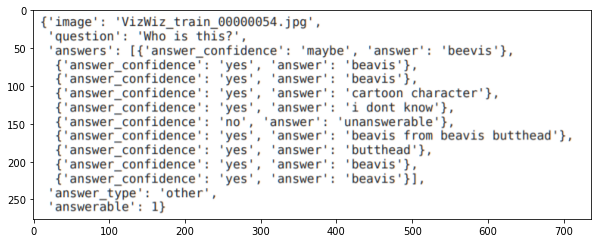

In [8]:
import cv2
img = cv2.imread("JSON_Train.PNG")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

In [25]:
import json
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [2]:
def most_common(ans):
    '''
    This function takes a list of all the answers for a particular question and returns the most occured answer. 
    '''
    ans_count=Counter(ans)
    return ans_count.most_common(1)[0][0]

### Extracting the questions/answers from JSON

We have created a dataframe from the JSON files provided. The dataframe has the following columns - 
1. image - The name of the image
2. question - The question about the image
3. final_answer - The most common answer

In [3]:
f=open("Annotations/train.json")
d = json.load(f)
f.close()
print("Number of questions in train data:",len(d))

image=[]
question=[]
final_answer=[]
answer_list=[]
for i in range(0,len(d)):
    image.append(d[i]["image"])
    question.append(d[i]["question"])
    for a in d[i]["answers"]:
        answer_list.append(a["answer"])
    final_answer.append(most_common(answer_list))
    answer_list=[]
    
train = pd.DataFrame(zip(image,question,final_answer),
             columns=["image","question","final_answer"])

Number of questions in train data: 20523


In [6]:
train.sample(5)

image  \
7420   VizWiz_train_00007420.jpg   
13742  VizWiz_train_00013742.jpg   
19489  VizWiz_train_00019489.jpg   
14904  VizWiz_train_00014904.jpg   
10727  VizWiz_train_00010727.jpg   

                                                question         final_answer  
7420                                   What is this can?           roast beef  
13742                                      What is this?  cream mushroom soup  
19489                           What is it? Is it woman?           unsuitable  
14904  Hey could you please tell me if this took the ...                  yes  
10727                          What kind of dog is this?           yellow lab

In [4]:
f=open("Annotations/val.json")
d = json.load(f)
f.close()
print("Number of questions in validation data:",len(d))

image=[]
question=[]
final_answer=[]
answer_list=[]
for i in range(0,len(d)):
    image.append(d[i]["image"])
    question.append(d[i]["question"])
    for a in d[i]["answers"]:
        answer_list.append(a["answer"])
    final_answer.append(most_common(answer_list))
    answer_list=[]
    
val = pd.DataFrame(zip(image,question,final_answer),
             columns=["image","question","final_answer"])

Number of questions in validation data: 4319


In [8]:
val.sample(5)

image  \
2446  VizWiz_val_00002446.jpg   
3966  VizWiz_val_00003966.jpg   
1807  VizWiz_val_00001807.jpg   
157   VizWiz_val_00000157.jpg   
1521  VizWiz_val_00001521.jpg   

                                               question         final_answer  
2446                                  What is this fox?         unanswerable  
3966                               What is in this can?                 soup  
1807                                What color is this?                 blue  
157   Yes, can you please tell me what this screen s...  american megatrends  
1521                                   Is that a paper?                   no

In [73]:
train.to_csv("train.csv",index=False)
val.to_csv("val.csv",index=False)

#### Let us visualize some images and check the question/answer from the train dataset

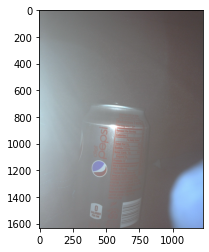

Question:  What is this can in my left?
Answer:  diet pepsi
------------------------------------------------------------------------------------


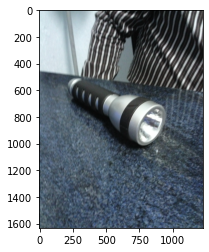

Question:  What is that?
Answer:  flashlight
------------------------------------------------------------------------------------


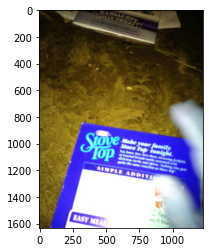

Question:  Is there any other writing other than Stove Top? I need to know what is in this package. Thank you.
Answer:  yes
------------------------------------------------------------------------------------


In [31]:
d = train.sample(3)
for i in range(0,len(d)):
    img = cv2.imread("/media/anika/DATA/Downloads/train/"+d["image"].iloc[i])
    plt.imshow(img)
    plt.show()
    print("Question: ",d["question"].iloc[i])
    print("Answer: ",d["final_answer"].iloc[i])
    print("------------------------------------------------------------------------------------")

#### Let us visualize some images and check the question/answer from the validation dataset

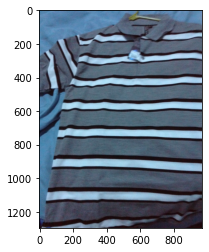

Question:  Describe this shirt to me.
Answer:  grey white stripes
------------------------------------------------------------------------------------


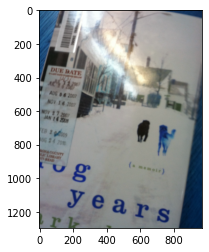

Question:  What is the title of this book?
Answer:  dog years
------------------------------------------------------------------------------------


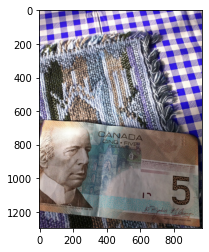

Question:  What denomination is this?
Answer:  5
------------------------------------------------------------------------------------


In [34]:
d = val.sample(3)
for i in range(0,len(d)):
    img = cv2.imread("/media/anika/DATA/Downloads/val/"+d["image"].iloc[i])
    plt.imshow(img)
    plt.show()
    print("Question: ",d["question"].iloc[i])
    print("Answer: ",d["final_answer"].iloc[i])
    print("------------------------------------------------------------------------------------")

#### Distribution of Length of the question

========== Question Length Distribution for Train Dataset ==========

25th Percentile is 4.0
50th Percentile is 5.0
75th Percentile is 8.0
90th Percentile is 12.0
92th Percentile is 14.0
93th Percentile is 14.0
95th Percentile is 17.0
99th Percentile is 31.0


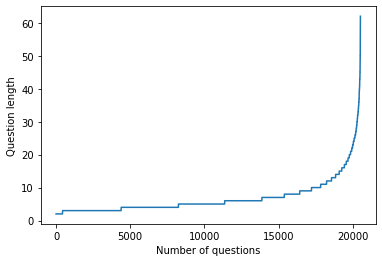

In [63]:
ttrain_len = [len(i.split(" ")) for i in train["question"]]

print("========== Question Length Distribution for Train Dataset ==========")
print("\n25th Percentile is",np.percentile(ttrain_len,25))
print("50th Percentile is",np.percentile(ttrain_len,50))
print("75th Percentile is",np.percentile(ttrain_len,75))
print("90th Percentile is",np.percentile(ttrain_len,90))
print("92th Percentile is",np.percentile(ttrain_len,92))
print("93th Percentile is",np.percentile(ttrain_len,93))
print("95th Percentile is",np.percentile(ttrain_len,95))
print("99th Percentile is",np.percentile(ttrain_len,99))
plt.plot(sorted(ttrain_len))
plt.xlabel("Number of questions")
plt.ylabel("Question length")
plt.show()

========== Question Length Distribution for Validation Dataset ==========

25th Percentile is 4.0
50th Percentile is 5.0
75th Percentile is 8.0
90th Percentile is 14.0
92th Percentile is 15.0
93th Percentile is 16.0
95th Percentile is 19.0
99th Percentile is 33.0


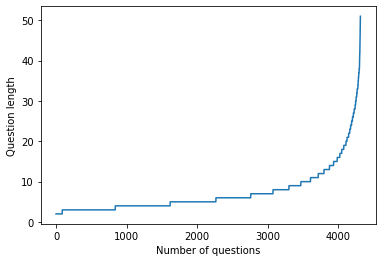

In [64]:
#Length of question
vtrain_len = [len(i.split(" ")) for i in val["question"]]

print("========== Question Length Distribution for Validation Dataset ==========")
print("\n25th Percentile is",np.percentile(vtrain_len,25))
print("50th Percentile is",np.percentile(vtrain_len,50))
print("75th Percentile is",np.percentile(vtrain_len,75))
print("90th Percentile is",np.percentile(vtrain_len,90))
print("92th Percentile is",np.percentile(vtrain_len,92))
print("93th Percentile is",np.percentile(vtrain_len,93))
print("95th Percentile is",np.percentile(vtrain_len,95))
print("99th Percentile is",np.percentile(vtrain_len,99))
plt.plot(sorted(vtrain_len))
plt.xlabel("Number of questions")
plt.ylabel("Question length")
plt.show()

#### Observations

1. Train and Validation data have the same distribution for question length.
2. About 80% of questions have a length less than or equal to 10 words.
3. This indicates that questions are mostly precise and short.

#### Understanding the type of questions

In [5]:
question_list = []
for q in train["question"]:
    if(len(q.split(" "))>=2):
        question_list.append(q.split(" ")[0:2])
        
ques_sunburst = pd.DataFrame(question_list,columns=["First","Second"])

In [6]:
print("\n==========================     Type of questions from train dataset     ==========================")
fig = px.sunburst(ques_sunburst, path=["First","Second"]) 
fig.show()


==========================     Type of questions from train dataset     ==========================


In [11]:
question_list = []
for q in val["question"]:
    if(len(q.split(" "))>=2):
        question_list.append(q.split(" ")[0:2])
        
ques_sunburst = pd.DataFrame(question_list,columns=["First","Second"])

In [8]:
print("\n==========================     Type of questions from validation dataset     ==========================")
fig = px.sunburst(ques_sunburst, path=["First","Second"]                  ) 
fig.show()


==========================     Type of questions from validation dataset     ==========================


#### Observations

1. From the above sunburst plots, we can see that "WHAT IS" is the most prevalent question word in both of the datasets.
2. "WHAT" is the most common parent word and covers more than half of the questions in both the datasets.
3. "CAN" is the second most occuring parent word. 
4. The distribution of both the datasets is similar in terms of the questions asked.

#### Understanding the question vocabulary

In [21]:
cnt = set()
for q in train["question"]:
    words = q.split()
    for word in words:
        if word not in cnt:
            cnt.add(word)
            
print("Number of unique words in train data questions: ",len(cnt))

Number of unique words in train data questions:  6805


In [22]:
cnt = set()
for q in val["question"]:
    words = q.split()
    for word in words:
        if word not in cnt:
            cnt.add(word)
            
print("Number of unique words in validation data questions: ",len(cnt))

Number of unique words in validation data questions:  3033



=====================   Question Wordcloud from train dataset   =====================


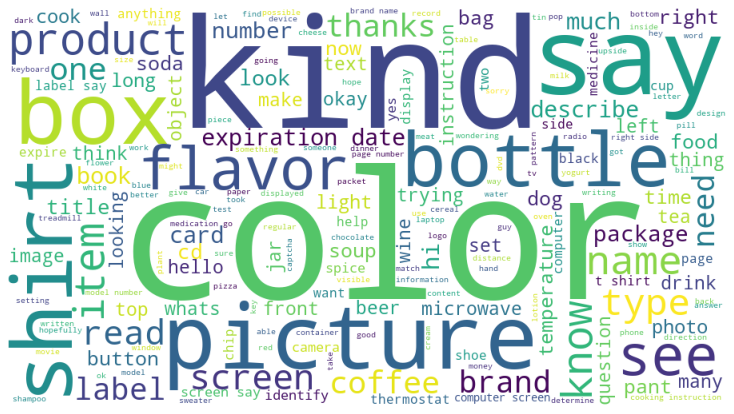

In [36]:
all_words = ""
stopwords = set(STOPWORDS)
stopwords.add("please")
stopwords.add("thank")
stopwords.add("tell")
for i in train["question"]:
    tokens=i.split()
    tokens = [j.lower() for j in tokens]
    all_words+=' '.join(tokens)+" "
    
wordcloud = WordCloud(width = 900, height = 500, 
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_words) 
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
print("\n=====================   Question Wordcloud from train dataset   =====================")

plt.show()


=====================   Question Wordcloud from validation dataset   =====================


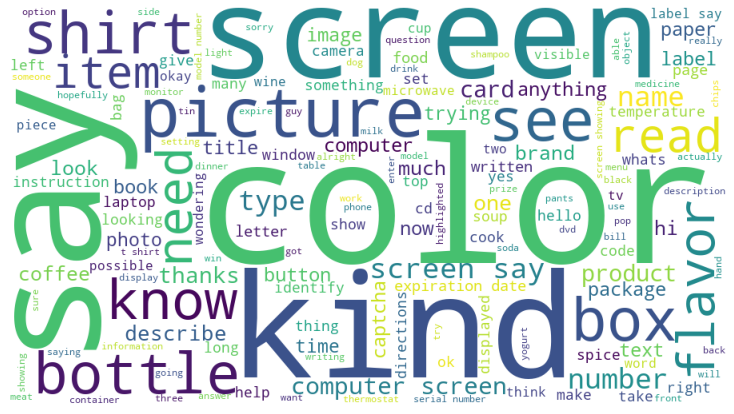

In [37]:
all_words = ""
for i in val["question"]:
    tokens=i.split()
    tokens = [j.lower() for j in tokens]
    all_words+=' '.join(tokens)+" "
    
wordcloud = WordCloud(width = 900, height = 500, 
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_words) 
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
print("\n=====================   Question Wordcloud from validation dataset   =====================")

plt.show()

#### Observations

1. From the above plots we can conclude that the vocabulary for the train and validation questions is similar.
2. Most of the questions asked are about the colour of an object.
3. Flavor of an object is also a common query.
4. Some common objects are Bottle, Shirt, Screen, Coffee etc.

#### Distribution of Length of the answers

========== Answer Length Distribution for Train Dataset ==========

25th Percentile is 1.0
50th Percentile is 1.0
75th Percentile is 2.0
90th Percentile is 2.0
92th Percentile is 3.0
93th Percentile is 3.0
95th Percentile is 3.0
99th Percentile is 5.0


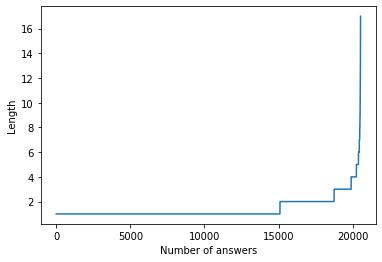

In [6]:
ttrain_len = [len(i.split(" ")) for i in train["final_answer"]]

print("========== Answer Length Distribution for Train Dataset ==========")
print("\n25th Percentile is",np.percentile(ttrain_len,25))
print("50th Percentile is",np.percentile(ttrain_len,50))
print("75th Percentile is",np.percentile(ttrain_len,75))
print("90th Percentile is",np.percentile(ttrain_len,90))
print("92th Percentile is",np.percentile(ttrain_len,92))
print("93th Percentile is",np.percentile(ttrain_len,93))
print("95th Percentile is",np.percentile(ttrain_len,95))
print("99th Percentile is",np.percentile(ttrain_len,99))
plt.plot(sorted(ttrain_len))
plt.xlabel("Number of answers")
plt.ylabel("Length")
plt.show()

========== Answer Length Distribution for Validation Dataset ==========

25th Percentile is 1.0
50th Percentile is 1.0
75th Percentile is 2.0
90th Percentile is 2.0
92th Percentile is 3.0
93th Percentile is 3.0
95th Percentile is 3.0
99th Percentile is 5.0


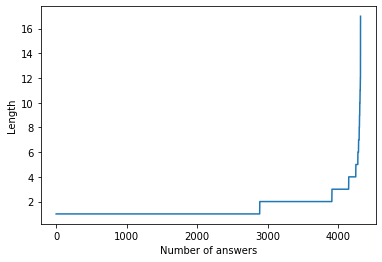

In [7]:
ttrain_len = [len(i.split(" ")) for i in val["final_answer"]]

print("========== Answer Length Distribution for Validation Dataset ==========")
print("\n25th Percentile is",np.percentile(ttrain_len,25))
print("50th Percentile is",np.percentile(ttrain_len,50))
print("75th Percentile is",np.percentile(ttrain_len,75))
print("90th Percentile is",np.percentile(ttrain_len,90))
print("92th Percentile is",np.percentile(ttrain_len,92))
print("93th Percentile is",np.percentile(ttrain_len,93))
print("95th Percentile is",np.percentile(ttrain_len,95))
print("99th Percentile is",np.percentile(ttrain_len,99))
plt.plot(sorted(ttrain_len))
plt.xlabel("Number of answers")
plt.ylabel("Length")
plt.show()

#### Observations

1. Both the training as well as validation datasets have the same distribution.
2. More than 50% of data has single word answer.
3. The probability of having answer length less than or equal to 2 is as high as 0.9.

#### Understanding the answer vocabulary


=====================   Type of answers from train dataset   =====================


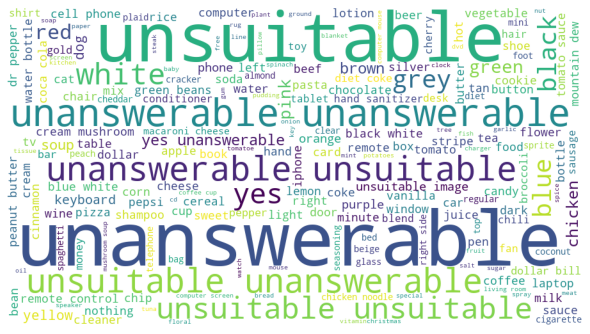

In [77]:
all_words = ""
for i in train["final_answer"]:
    tokens=i.split()
    all_words+=' '.join(tokens)+" "
    
wordcloud = WordCloud(width = 900, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
print("\n=====================   Type of answers from train dataset   =====================")

plt.show() 


=====================   Type of answers from validation dataset   =====================


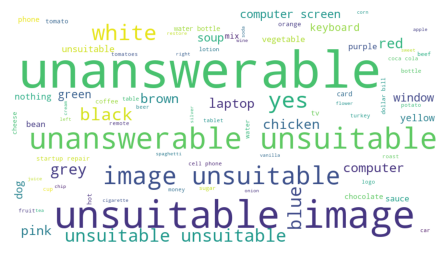

In [14]:
all_words = ""
for i in val["final_answer"]:
    tokens=i.split()
    all_words+=' '.join(tokens)+" "
    
wordcloud = WordCloud(width = 900, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
print("\n=====================   Type of answers from validation dataset   =====================")

plt.show() 

1. The answer vocabulary is similar in both of the datasets.
2. The most common answer is "unanswerable" as visible from the plot above.
3. The second most popular is "unsuitable". 
4. Other than these, different colours like grey, black, white etc. are also very common.
5. "Yes" is also very common answer.

In [35]:
print("Total number of answer labels are",len(train["final_answer"].unique()))

Total number of answer labels are 5630


In [90]:
print("Percentage of unanswerable/unsuitable questions is",np.round((train["final_answer"].value_counts()
                            ["unanswerable"]+train["final_answer"].value_counts()["unsuitable"])/len(train) *100,2))

Percentage of unanswerable/unsuitable questions is 34.01


In [84]:
print("Percentage of yes/no answers is",np.round((train["final_answer"].value_counts()["yes"]+
                                                  train["final_answer"].value_counts()["no"])/len(train) *100,2))

Percentage of yes/no answers is 5.28


Let us look at the top answer labels in the train dataset.

In [87]:
print("====Top answer labels====")
train["final_answer"].value_counts()[0:10]

====Top answer labels====


unanswerable    3941
unsuitable      3038
no               567
yes              516
white            298
grey             289
black            234
blue             217
red              131
pink             102
Name: final_answer, dtype: int64

#### How many labels are enough?

I am going to pose this problem as a classification problem taking the top answer labels as classes and try to predict them. For this, I have calculated the number of answers covered based on the count of answer labels considered. 

Percentage of points covered by top 100 labels is 58.11
Percentage of points covered by top 500 labels is 69.82
Percentage of points covered by top 1000 labels is 75.8
Percentage of points covered by top 1500 labels is 79.88
Percentage of points covered by top 2000 labels is 82.31
Percentage of points covered by top 3000 labels is 87.19
Percentage of points covered by top 4000 labels is 92.06
Percentage of points covered by top 5500 labels is 99.37


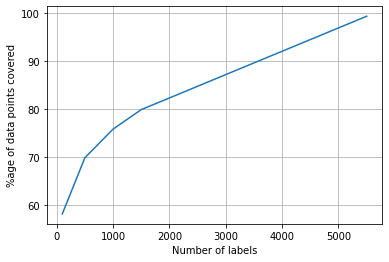

In [12]:
labels1 = train["final_answer"].value_counts()[0:100].keys()
labels2 = train["final_answer"].value_counts()[0:500].keys()
labels3 = train["final_answer"].value_counts()[0:1000].keys()
labels4 = train["final_answer"].value_counts()[0:1500].keys()
labels5 = train["final_answer"].value_counts()[0:2000].keys()
labels6 = train["final_answer"].value_counts()[0:3000].keys()
labels7 = train["final_answer"].value_counts()[0:4000].keys()
labels8 = train["final_answer"].value_counts()[0:5500].keys()
label_count=[]
per=[]
count1=count2=count3=count4=count5=count6=count7=count8=0
for i in train["final_answer"]:
    if(i in labels1):
        count1+=1
        count2+=1
        count3+=1
        count4+=1
        count5+=1
        count6+=1
        count7+=1
        count8+=1
    elif(i in labels2):
        count2+=1
        count3+=1
        count4+=1
        count5+=1
        count6+=1
        count7+=1
        count8+=1
    elif(i in labels3):
        count3+=1
        count4+=1
        count5+=1
        count6+=1
        count7+=1
        count8+=1
    elif(i in labels4):
        count4+=1
        count5+=1
        count6+=1
        count7+=1
        count8+=1
    elif(i in labels5):
        count5+=1
        count6+=1
        count7+=1
        count8+=1
    elif(i in labels6):
        count6+=1
        count7+=1
        count8+=1
    elif(i in labels7):
        count7+=1
        count8+=1
    elif(i in labels8):
        count8+=1

print("Percentage of points covered by top 100 labels is",np.round(count1/len(train) *100,2))
label_count.append(100)
per.append(np.round(count1/len(train) *100,2))
print("Percentage of points covered by top 500 labels is",np.round(count2/len(train) *100,2))
label_count.append(500)
per.append(np.round(count2/len(train) *100,2))
print("Percentage of points covered by top 1000 labels is",np.round(count3/len(train) *100,2))
label_count.append(1000)
per.append(np.round(count3/len(train) *100,2))
print("Percentage of points covered by top 1500 labels is",np.round(count4/len(train) *100,2))
label_count.append(1500)
per.append(np.round(count4/len(train) *100,2))
print("Percentage of points covered by top 2000 labels is",np.round(count5/len(train) *100,2))
label_count.append(2000)
per.append(np.round(count5/len(train) *100,2))
print("Percentage of points covered by top 3000 labels is",np.round(count6/len(train) *100,2))
label_count.append(3000)
per.append(np.round(count6/len(train) *100,2))
print("Percentage of points covered by top 4000 labels is",np.round(count7/len(train) *100,2))
label_count.append(4000)
per.append(np.round(count7/len(train) *100,2))
print("Percentage of points covered by top 5500 labels is",np.round(count8/len(train) *100,2))
label_count.append(5500)
per.append(np.round(count8/len(train) *100,2))

plt.plot(label_count,per)
plt.grid()
plt.xlabel("Number of labels")
plt.ylabel("%age of data points covered")
plt.show()

From the above plot we can see that a clear elbow point is missing which indicates that we will have to take a high value of the number of labels to perform this classification task. But a high value of number of classes in a classification task could hamper the performance of the model. Therefore, we need to find a value which covers maximum data and does not create much problem in the modelling also.